# Agent-based model

This is a model of embryonic neocortex population, using an agent-based framework.
This means that we create cells, on we sample a Tc from the age-related distribution.
At the end of cell cycle, the fate decision for the daughters are.

The model starts at E48, where we have the first data.

Data will be of different types :

Tc:
- Population level estimation
- Cell level estimation

Differentiation:
- Cell level estimation

Number of progenitors:
- Ki67 ratio in GZ
- Ratio of Tbr2+ and Sox2+

Number of cells:
- Relative volume from Histo + MRI
- Density of cells

We will have to discuss quality of the data

In [1]:
# imports
import numpy as np
import seaborn as sns
import tqdm
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
from numpy.random import choice
from scipy.interpolate import splev, splrep, interp1d
from scipy import stats
from collections import Counter
from model import AbstractCell, Action, Brain, Submodels
from submodels.cellbasic1 import CellBasic
from submodels.bistate1 import BiStateModelFactory
from submodels.tristate1 import TriStateModelFactory
from submodels import factories

In [2]:
random.seed(0+0)
np.random.seed(0+0)

ccls = BiStateModelFactory(
    diff_values_RG=[0.63, 0.53, 0.43, 0.38, 0.33], # rather RG_low
    diff_values_RG_GP=[1., 1., 1., 0.8, 0.6], # rather RG_high
    diff_values_IP=[0.23, 0.23, 0.23, 0.23, 0.23],
)
bb = Brain(time_step=0.5, verbose=False, start_population=6,
           cell_cls=ccls.generate, rA=2.5, a=4.6)
bb.run()

Ticking abs : 49.0, step : 0.5
Ticking abs : 49.5, step : 0.5
Ticking abs : 50.0, step : 0.5
Ticking abs : 50.5, step : 0.5
Ticking abs : 51.0, step : 0.5
Ticking abs : 51.5, step : 0.5
Ticking abs : 52.0, step : 0.5
Ticking abs : 52.5, step : 0.5
Ticking abs : 53.0, step : 0.5
Ticking abs : 53.5, step : 0.5
Ticking abs : 54.0, step : 0.5
Ticking abs : 54.5, step : 0.5
Ticking abs : 55.0, step : 0.5
Ticking abs : 55.5, step : 0.5
Ticking abs : 56.0, step : 0.5
Ticking abs : 56.5, step : 0.5
Ticking abs : 57.0, step : 0.5
Ticking abs : 57.5, step : 0.5
Ticking abs : 58.0, step : 0.5
Ticking abs : 58.5, step : 0.5
Ticking abs : 59.0, step : 0.5
Ticking abs : 59.5, step : 0.5
Ticking abs : 60.0, step : 0.5
Ticking abs : 60.5, step : 0.5
Ticking abs : 61.0, step : 0.5
Ticking abs : 61.5, step : 0.5
Ticking abs : 62.0, step : 0.5
Ticking abs : 62.5, step : 0.5
Ticking abs : 63.0, step : 0.5
Ticking abs : 63.5, step : 0.5
Ticking abs : 64.0, step : 0.5
Ticking abs : 64.5, step : 0.5
Ticking 

In [3]:
bb.stats.tail()

,progenitor_pop_size,size_type_RG,time,whole_pop_size,size_type_IP,size_type_PostMitotic
91.5,81.0,6.0,91.5,3893.0,50.0,25.0
92.0,66.0,5.0,92.0,3903.0,46.0,15.0
92.5,63.0,4.0,92.5,3915.0,46.0,13.0
93.0,62.0,3.0,93.0,3927.0,47.0,12.0
93.5,58.0,3.0,93.5,3935.0,45.0,10.0


In [4]:
len(bb.tissue.history)

90

In [13]:
h = [c.position for c in bb.tissue.history[-1]]

In [14]:
h

[array([ 2.28543304, -0.47917035]),
 array([ 1.36303075, -1.37744146]),
 array([ 3.41729416, -3.6873874 ]),
 array([ 3.12611805, -1.0959815 ]),
 array([2.18579947, 0.30991925]),
 array([ 3.0665687 , -2.74773272]),
 array([0.82447754, 2.65965742]),
 array([-1.45457209,  4.44289563]),
 array([-0.72655202,  0.28593265]),
 array([ 5.36018109, -1.18862171]),
 array([0.79863407, 0.94892974]),
 array([ 3.03577934, -4.48119733]),
 array([ 1.5102808 , -0.50403587]),
 array([ 5.57336936, -2.14315873]),
 array([-0.74348072, -1.49651861]),
 array([-6.10930327e-04,  4.26955226e+00]),
 array([ 4.61890635, -1.39517692]),
 array([ 2.59405208, -3.58090326]),
 array([ 5.86522458, -0.22180626]),
 array([ 3.06835068, -0.16437038]),
 array([-2.11357701,  1.89778507]),
 array([-0.72960565,  1.89682335]),
 array([-0.56455039,  2.83381321]),
 array([ 3.5743194 , -2.04215749]),
 array([ 2.33721818, -2.69114218]),
 array([1.88169124, 1.21350754]),
 array([4.97485236, 0.11612032]),
 array([1.09826835, 1.79100254

In [5]:
def plot_2d_population(cell_list, color='blue'):
    """Plot a two dimensional population provided as a list of Cell objects."""

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for cell in cell_list:
        ax.add_patch(plt.Circle(cell.position, 0.5, color=color, alpha=0.4))
        plt.plot(cell.position[0], cell.position[1], '.', color=color)
    ax.set_aspect('equal')
    plt.show()


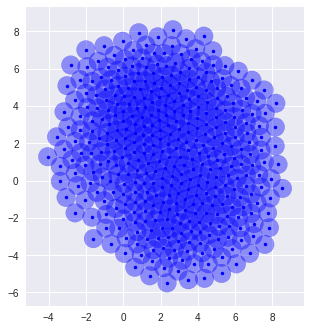

In [9]:
plot_2d_population(bb.tissue.history[49])

In [7]:
raise

RuntimeError: No active exception to reraise

In [ ]:
random.seed(0+0)
np.random.seed(0+0)
ccls = TriStateModelFactory(
    diff_values_RG_IP=[0.63, 0.53, 0.43, 0.38, 0.33], # rather RG_low
    diff_values_RG_GP=[1., 1., 1., 0.8, 0.6], # rather RG_high
    diff_values_IP=[0.23, 0.23, 0.23, 0.23, 0.23],
)
bb = Brain(time_step=0.5, verbose=False, start_population=8, cell_cls=ccls.generate, check=False)
bb.run()

In [ ]:
bb.stats.tail()

In [ ]:
from viz import plot_size, plot_ratio
plot_size(bb.stats)

In [ ]:
plot_ratio(bb.stats)

In [ ]:
prog = progeny_along_time(bb, only_leaves=True)
plot_progeny(prog)

In [ ]:
prog = progeny_along_time(bb, only_leaves=False)
plot_progeny(prog)

In [ ]:
A = bb.root_population[0]
A

In [ ]:
tree = tree_from_cell(A)

In [ ]:
for node in tree.get_leaves():
    print(node.name)
    break

In [ ]:
bb.population[1981].appear_time

In [ ]:
a = tree.get_children()[0]
b = a.get_children()[0]
c = b.get_children()[0]
d = c.get_children()[0]
a, b, c, d

In [ ]:
def df_cells(pop):
    times = list(map(lambda x: x.appear_time, pop.values()))
    div_times = list(map(lambda x: x.division_time, pop.values()))
    types = list(map(lambda x: x.type().name, pop.values()))
    index = list(map(lambda x: x.index, pop.values()))
    parent = list(map(lambda x: x.parent, pop.values()))
    child1 = list(map(lambda x: (x.children + [None]*2)[0], pop.values()))
    child2 = list(map(lambda x: (x.children + [None]*2)[1], pop.values()))
    Tc = list(map(lambda x: np.float64(x.Tc) * 24, pop.values()))
    df = pd.DataFrame({"cell": index, "appear_time": times, "division_time": div_times,
                       "type": types, "parent": parent,
                       "D1": child1, "D2": child2, "Tc": Tc}
                     )
    return df

df = df_cells(bb.population)
df.head(20)

In [ ]:
df[df["Tc"] > 1000].head(20)

In [ ]:
df["Tc"].hist()

In [ ]:
tmp_df = pd.merge(df, df, how='inner', left_on="D1", right_on="cell", suffixes=('_M', '_D1'))
full_df = pd.merge(tmp_df, df.rename(columns=lambda x: x + "_D2"), how='inner', left_on="D2_M",
                   right_on="cell_D2", suffixes=('_M', '_D2'))
full_df["group"] = 2 + 1 * (full_df["appear_time_M"] > 75)
full_df

In [ ]:
full_df["Tc_D2"].hist()

In [ ]:
full_df[["Tc_M", "Tc_D1", "Tc_D2"]].head(5)

In [ ]:
df_no_gp = full_df[full_df_df[""]]

In [ ]:
key1 = "Tc_M"
key2 = "Tc_D1"
filt = full_df["group"] == 3
cur_df = full_df.loc[full_df[key1].notnull() & full_df[key2].notnull() & filt, :]
stats.pearsonr(cur_df[key1], cur_df[key2])

In [ ]:
key1 = "Tc_D1"
key2 = "Tc_D2"
filt = full_df["group"] == 3
cur_df = full_df.loc[full_df[key1].notnull() & full_df[key2].notnull() & filt, :]
(cur_df[key1] / cur_df[key2]).describe()

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(full_df["appear_time_M"], full_df["Tc_M"], alpha=0.5, linewidths=1)
plt.figure(figsize=(12, 8))
no_gp = (full_df["type_D1"] != "GP") & (full_df["type_D2"] != "GP")
plt.scatter(full_df["Tc_D1"][no_gp], full_df["Tc_M"][no_gp], alpha=0.5, linewidths=1)
plt.scatter(full_df["Tc_D1"][no_gp], full_df["Tc_D2"][no_gp], alpha=0.5, linewidths=1)

## Fate_cor

In [ ]:
prog_df = full_df.copy()
no_gp = (full_df["type_D1"] != "GP") & (full_df["type_D2"] != "GP")
filt = prog_df["group"].isin([2, 3]) & no_gp
prog_df = prog_df[filt]
prog_df["prog_D1"] = prog_df["type_D1"].apply(lambda x: "Cycling" if x in ["IP", "RG"] else "PM")
prog_df["prog_D2"] = prog_df["type_D2"].apply(lambda x: "Cycling" if x in ["IP", "RG"] else "PM")
res_fate_cor = prog_df.groupby(["prog_D1", "prog_D2"]).size()
res_fate_cor

In [ ]:
CC, CN, NN = res_fate_cor[0], res_fate_cor[1] + res_fate_cor[2], res_fate_cor[3]
T = CC + CN + NN
pCC, pCN, pNN = CC / T, CN / T, NN / T
print(f"Values CC:{CC}, CN:{CN}, NN:{NN}")
print(f"Obs Prop CC:{pCC}, CN:{pCN}, NN:{pNN}")
all_C, all_N = 2 * CC + CN, 2 * NN + CN
pC, pN = all_C / (all_C + all_N), all_N / (all_C + all_N)
eCC, eCN, eNN = pC**2, 2*pC*pN, pN**2
sum_to_one = eCC + eCN + eNN
print(f"Control : {sum_to_one}")
print(f"Exp Prop CC:{eCC}, CN:{eCN}, NN:{eNN}")
F_metric = 1 - pCN / eCN
print("F_metric :", F_metric)

## Relationship of Tc between mother cell and daughter cell

In [ ]:
no_gp = (full_df["type_D1"] != "GP") & (full_df["type_D2"] != "GP")
filt = full_df["group"].isin([2, 3]) & no_gp
key1 = "Tc_M"
key2 = "Tc_D1"
cur_df = full_df.loc[full_df[key1].notnull() & full_df[key2].notnull() & filt, :]
var1 = cur_df[key1] / cur_df[key2]
var2 = cur_df[key1] - cur_df[key2]
np.mean(var1), np.std(var1), np.mean(var2), np.std(var2)

## Cor TC daughter cells

In [ ]:
# group 2
no_gp = (full_df["type_D1"] != "GP") & (full_df["type_D2"] != "GP")
filt = full_df["group"].isin([2]) & no_gp
key1 = "Tc_D2"
key2 = "Tc_D1"
cur_df = full_df.loc[full_df[key1].notnull() & full_df[key2].notnull() & filt, :]
stats.pearsonr(cur_df[key1], cur_df[key2])

In [ ]:
# group 3
no_gp = (full_df["type_D1"] != "GP") & (full_df["type_D2"] != "GP")
filt = full_df["group"].isin([3]) & no_gp
key1 = "Tc_D2"
key2 = "Tc_D1"
cur_df = full_df.loc[full_df[key1].notnull() & full_df[key2].notnull() & filt, :]
stats.pearsonr(cur_df[key1], cur_df[key2])

In [ ]:
# group 2+3
no_gp = (full_df["type_D1"] != "GP") & (full_df["type_D2"] != "GP")
filt = full_df["group"].isin([2, 3]) & no_gp
key1 = "Tc_D2"
key2 = "Tc_D1"
cur_df = full_df.loc[full_df[key1].notnull() & full_df[key2].notnull() & filt, :]
stats.pearsonr(cur_df[key1], cur_df[key2])

## Cor TC / output

In [ ]:
# we must calc nb_child_pm

In [ ]:
# group 2
prog_df = full_df.copy()
no_gp = (full_df["type_D1"] != "GP") & (full_df["type_D2"] != "GP")
filt = prog_df["group"].isin([2]) & no_gp
prog_df = prog_df[filt]
prog_df["prog_D1"] = prog_df["type_D1"].apply(lambda x: "Cycling" if x in ["IP", "RG"] else "PM")
prog_df["prog_D2"] = prog_df["type_D2"].apply(lambda x: "Cycling" if x in ["IP", "RG"] else "PM")
prog_df["nb_child_pm"] = (prog_df["prog_D1"] == "PM").astype(int) + (prog_df["prog_D2"] == "PM").astype(int)
stats.pearsonr(prog_df["nb_child_pm"], prog_df["Tc_M"])

In [ ]:
# group 3
prog_df = full_df.copy()
no_gp = (full_df["type_D1"] != "GP") & (full_df["type_D2"] != "GP")
filt = prog_df["group"].isin([3]) & no_gp
prog_df = prog_df[filt]
prog_df["prog_D1"] = prog_df["type_D1"].apply(lambda x: "Cycling" if x in ["IP", "RG"] else "PM")
prog_df["prog_D2"] = prog_df["type_D2"].apply(lambda x: "Cycling" if x in ["IP", "RG"] else "PM")
prog_df["nb_child_pm"] = (prog_df["prog_D1"] == "PM").astype(int) + (prog_df["prog_D2"] == "PM").astype(int)
stats.pearsonr(prog_df["nb_child_pm"], prog_df["Tc_M"])

In [ ]:
# group 2+3
prog_df = full_df.copy()
no_gp = (full_df["type_D1"] != "GP") & (full_df["type_D2"] != "GP")
filt = prog_df["group"].isin([2, 3]) & no_gp
prog_df = prog_df[filt]
prog_df["prog_D1"] = prog_df["type_D1"].apply(lambda x: "Cycling" if x in ["IP", "RG"] else "PM")
prog_df["prog_D2"] = prog_df["type_D2"].apply(lambda x: "Cycling" if x in ["IP", "RG"] else "PM")
prog_df["nb_child_pm"] = (prog_df["prog_D1"] == "PM").astype(int) + (prog_df["prog_D2"] == "PM").astype(int)
stats.pearsonr(prog_df["nb_child_pm"], prog_df["Tc_M"])

## Old stuff

In [ ]:
bb.population[134].__dict__

In [ ]:
raise

## Experimenting

In [ ]:
def condition_number(obj):
    dist = obj.get_final_dist("whole_pop_size")
    mu, sigma, N = np.mean(dist), np.std(dist), len(dist)
    if N < 3:
        return False
    CI = stats.norm.interval(0.90, loc=mu, scale=sigma/np.sqrt(N))
    _range = CI[1] - CI[0]
    
    cond = _range < 0.01 * mu  # relative
    if cond:
        print(_range, 0.01 * mu, np.min(dist), np.max(dist), np.percentile(dist, 10), np.percentile(dist, 90))
        
    return cond

# robustness = 1 / unstability
def run_robustness_analysis(coeff=1.1, number=30, seed=0, start_population=5, max_number=200):
    results = pd.DataFrame(dict(param=[],
                               coeff=[],
                               variation_neuron=[],
                               neurons_std=[],
                               baseline_neuron=[],
                               baseline_neuron_std=[],
                               unstability_neuron=[],
                               robustness_neuron=[],
                               variation_ratio=[],
                               ratio_std=[],
                               baseline_ratio=[],
                               baseline_ratio_std=[],
                               unstability_ratio=[],
                               robustness_ratio=[]))
    
    # get baselines
    print("Computing baselines")
    random.seed(seed)
    np.random.seed(seed)
    # ccls = BiStateModelFactory()
    t_ = ("bistate1", (), {})
    exp = Experiment(time_step=0.5, verbose=False, start_population=start_population,
                     cell_cls=t_, max_number=max_number,
                     check=False, cls_=Brain)
    exp.run_parallel(condition_number)
    baseline_neuron = exp.get_final("whole_pop_size")
    baseline_neuron_std = exp.get_final_std("whole_pop_size", mean=True)
    baseline_ratio = exp.get_final_ratio()
    baseline_ratio_std = exp.get_final_ratio_std()
    
    plt.ioff()
    print("Starting Robustness experiment")
    for param in ["tc_coeff_RG", "tc_coeff_IP", "diff_coeff_RG", "diff_coeff_IP"]:
        for t in range(4):
            kw = {param: [1. if i != t else coeff for i in range(5)]}
            print(f"{param}_{t} with {kw}")
            ccls = BiStateModelFactory(**kw)
            t_ = ("bistate1", (), kw)
            random.seed(seed)
            np.random.seed(seed)
            exp = Experiment(time_step=0.5, verbose=False, start_population=start_population,
                             cell_cls=t_, number=number, max_number=max_number,
                             check=False, cls_=Brain)
            exp.run_parallel(condition_number)
            
            neurons = exp.get_final("whole_pop_size")
            print(exp.get_final_dist("whole_pop_size"))
            neurons_std = exp.get_final_std("whole_pop_size", mean=True)
            print(neurons_std)
            ratio = exp.get_final_ratio()
            ratio_std = exp.get_final_ratio_std()
            
            unstability_neuron = (neurons - baseline_neuron) / baseline_neuron
            unstability_ratio = (ratio - baseline_ratio) / baseline_ratio
            
            dd = dict(
                param=param + "_" + str(t),
                coeff=coeff,
                variation_neuron=neurons - baseline_neuron,
                baseline_neuron=baseline_neuron,
                baseline_neuron_std=baseline_neuron_std,
                neurons_std=neurons_std,
                unstability_neuron=unstability_neuron,
                robustness_neuron=abs(1 / (1e-6 + unstability_neuron)),
                variation_ratio=ratio - baseline_ratio,
                ratio_std=ratio_std,
                baseline_ratio=baseline_ratio,
                baseline_ratio_std=baseline_ratio_std,
                unstability_ratio=unstability_ratio,
                robustness_ratio=abs(1 / (1e-6 + unstability_ratio)),
            )
            results = results.append(dd, ignore_index=True)
            
            # saving figures
            exp.show_pop()
            plt.savefig(f"output/stack/population_{param}_{t}.png")
            plt.close()
            exp.show_progenitor_pop()
            plt.savefig(f"output/stack/progenitor_{param}_{t}.png")
            plt.close()
            exp.show_ratio_IP(ratio_eomes)
            plt.savefig(f"output/stack/ratio_IP_{param}_{t}.png")
            plt.close()

    plt.close()
    plt.ion()
    return results

In [ ]:
# random.seed(0+0)
# np.random.seed(0+0)
# ccls = BiStateModelFactory(tc_coeff_RG=[1., 1., 1., 1., 1.])
# bb = Brain(time_step=0.5, verbose=False, start_population=3, cell_cls=CellBasic, check=False)
# bb.run()
# raise

In [ ]:
results = run_robustness_analysis(number=30, seed=0, start_population=5, max_number=200)
results.to_csv("output/robustness_rect4.csv")
results.head()

In [ ]:
results

In [ ]:
raise

In [ ]:
results.append(dict(param=0,
                   coeff=0,
                   variation=0,
                   baseline=0,
                   unstability=0,
                   robustness=0), ignore_index=True)

In [ ]:
plt.figure(figsize=(20, 20))
Counter(dict(bb.gpn.G.degree()).values())

In [ ]:
bb.stats

In [ ]:
plt.figure(figsize=(10, 10))
p1 = plt.plot(bb.stats.time, bb.stats.progenitor_pop_size, label="Progenitor population")
p2 = plt.plot(bb.stats.time, bb.stats.whole_pop_size, label="Whole Population")
plt.legend()
# plt.legend((p1, p2), ("Progenitor population", "Whole Population"))

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(bb.stats.time, bb.stats.size_type_RG, label="RG number")
plt.plot(bb.stats.time, bb.stats.size_type_IP, label="IP number")
plt.legend()

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(bb.stats.time, bb.stats.size_type_IP / (bb.stats.size_type_RG + bb.stats.size_type_IP),
         label="IP ratio")
plt.plot(ratio_eomes.index, ratio_eomes.val / 100, label="Reference IP ratio")
plt.legend()

In [ ]:
raise